In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg')
# Converta a imagem para o espaço de cores HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

# Definir a faixa de cores do protagonista (verde, por exemplo)
limite_inferior = np.array([40, 50, 50])  # Faixa inferior de valores de HSV para verde
limite_superior = np.array([80, 255, 255])  # Faixa superior de valores de HSV para verde

# Criar uma máscara usando a faixa de cores definida
mascara = cv2.inRange(hsv, limite_inferior, limite_superior)

# Encontrar contornos na máscara
contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar o contorno com a maior área (presumindo que seja o protagonista)
if contornos:
    maior_contorno = max(contornos, key=cv2.contourArea)
    # Desenhar um retângulo ao redor do contorno
    x, y, w, h = cv2.boundingRect(maior_contorno)
    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar a imagem com o retângulo ao redor do protagonista
cv2.imshow('Detecção do Protagonista', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_8184\4273811459.py:4: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg')


<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_10064\3995107264.py:5: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela


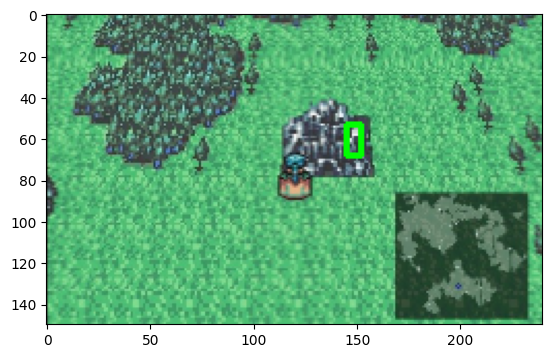

In [53]:
import cv2
import numpy as np

# Carregar a imagem da tela do jogo
imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela
imagem = cv2.resize(imagem, (240,150))
# Converter a imagem para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Definir uma região de interesse (ROI) ao redor do centro da tela
centro_x, centro_y = imagem.shape[1] // 2, imagem.shape[0] // 2
tamanho_roi = 70
roi = imagem_cinza[centro_y - tamanho_roi//2:centro_y + tamanho_roi//2,
                   centro_x - tamanho_roi//2:centro_x + tamanho_roi//2]

# Aplicar detecção de bordas na ROI (por exemplo, usando Canny)
bordas = cv2.Canny(roi, 1000, 1, 10)

# Encontrar contornos na imagem de bordas
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Procurar o contorno com a maior área
maior_contorno = max(contornos, key=cv2.contourArea)

# Obter o retângulo delimitador do contorno
x, y, w, h = cv2.boundingRect(maior_contorno)

# Desenhar o retângulo delimitador na imagem original
cv2.rectangle(imagem, (centro_x - tamanho_roi//2 + x, centro_y - tamanho_roi//2 + y),
              (centro_x - tamanho_roi//2 + x + w, centro_y - tamanho_roi//2 + y + h), (0, 255, 0), 2)

# # Mostrar a imagem com o retângulo ao redor do protagonista identificado
# cv2.imshow('Protagonista Identificado', imagem)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(imagem)

In [80]:
import cv2
import numpy as np

# Carregar a imagem da tela do jogo
imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela
imagem = cv2.resize(imagem, (240,150))

# Converter a imagem para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar detecção de bordas usando o método de Canny
bordas = cv2.Canny(imagem_cinza, 100, 200)

# Encontrar contornos na imagem de bordas
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Definir as dimensões do retângulo central
centro_x, centro_y = imagem.shape[1] // 2, imagem.shape[0] // 2
dimensoes_retangulo = (40, 40)  # Altere estas dimensões conforme necessário

# Filtrar contornos que estão dentro do retângulo central
contornos_filtrados = []
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    if (centro_x - dimensoes_retangulo[0] // 2) < (x + w // 2) < (centro_x + dimensoes_retangulo[0] // 2) and \
       (centro_y - dimensoes_retangulo[1] // 2) < (y + h // 2) < (centro_y + dimensoes_retangulo[1] // 2):
        contornos_filtrados.append(contorno)

# Desenhar retângulos ao redor dos contornos filtrados na imagem original
for contorno in contornos_filtrados:
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar a imagem com os retângulos ao redor dos contornos filtrados
cv2.imshow('Contornos próximos ao centro da tela', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_10064\2542602814.py:5: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela


In [109]:
import cv2
import numpy as np

# Carregar a imagem da tela do jogo
imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela
imagem = cv2.resize(imagem, (240,150))

# Converter a imagem para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar detecção de bordas usando o método de Canny
bordas = cv2.Canny(imagem_cinza, 100, 200)

# Encontrar contornos na imagem de bordas
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Definir as dimensões do retângulo central
centro_x, centro_y = imagem.shape[1] // 2, imagem.shape[0] // 2
dimensoes_retangulo = (40, 40)  # Altere estas dimensões conforme necessário

# Definir dimensões mínimas do contorno
dimensao_minima = (10, 10)
dimensao_maxima = (60, 60)
# Filtrar contornos que estão dentro do retângulo central e atendem às dimensões mínimas
contornos_filtrados = []
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    if (centro_x - dimensoes_retangulo[0] // 2) < (x + w // 2) < (centro_x + dimensoes_retangulo[0] // 2) and \
       (centro_y - dimensoes_retangulo[1] // 2) < (y + h // 2) < (centro_y + dimensoes_retangulo[1] // 2) and \
       dimensao_maxima[0] > w >= dimensao_minima[0] and dimensao_maxima[1] > h >= dimensao_minima[1]:
        contornos_filtrados.append(contorno)

# Desenhar retângulos ao redor dos contornos filtrados na imagem original
for contorno in contornos_filtrados:
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar a imagem com os retângulos ao redor dos contornos filtrados
cv2.imshow('Contornos próximos ao centro da tela', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_10064\1663456950.py:5: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela


# Treinar ML

In [15]:
import requests
from bs4 import BeautifulSoup
import os

base_urls = {
    'Terra': 'https://www.videogamesprites.net/FinalFantasy6/Party/Terra/',
    'Locke': 'http://www.videogamesprites.net/FinalFantasy6/Party/Locke/',
    'Edgar': 'http://www.videogamesprites.net/FinalFantasy6/Party/Edgar/',
    'Sabin': 'http://www.videogamesprites.net/FinalFantasy6/Party/Sabin/',
    'Celes': 'http://www.videogamesprites.net/FinalFantasy6/Party/Celes/',
    'Shadow': 'http://www.videogamesprites.net/FinalFantasy6/Party/Shadow/',
    'Cyan': 'http://www.videogamesprites.net/FinalFantasy6/Party/Cyan/',
    'Gau': 'http://www.videogamesprites.net/FinalFantasy6/Party/Gau/',
    'Setzer': 'http://www.videogamesprites.net/FinalFantasy6/Party/Setzer/',
    'Mog': 'http://www.videogamesprites.net/FinalFantasy6/Party/Mog/',
    'Strago': 'http://www.videogamesprites.net/FinalFantasy6/Party/Strago/',
    'Relm': 'http://www.videogamesprites.net/FinalFantasy6/Party/Relm/',
    'Gogo': 'http://www.videogamesprites.net/FinalFantasy6/Party/Gogo/',
    'Umaro': 'http://www.videogamesprites.net/FinalFantasy6/Party/Umaro/'
}

# Pasta onde as imagens serão salvas
output_folder = '..\\FFVI\\Sprites'

# Função para baixar as imagens para um personagem específico
def download_images(player, base_url):
    # Criar a pasta para o jogador atual
    player_folder = os.path.join(output_folder, player)
    os.makedirs(player_folder, exist_ok=True)
    
    # Fazer a requisição para obter o conteúdo HTML da página
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontrar todas as tags de imagem na página
    img_tags = soup.find_all('img')
    
    # Obter os URLs das imagens
    image_urls = [img['src'] for img in img_tags]
    
    # Baixar as imagens
    for image_url in image_urls:
        # Verificar se o URL tem um esquema especificado
        if not image_url.startswith(('http://', 'https://')):
            # Se o URL for relativo, construir o URL completo usando a base_url
            image_url = base_url + image_url
        
        # Caminho para salvar a imagem
        img_name = os.path.join(player_folder, os.path.basename(image_url))
        
        # Baixar e salvar a imagem
        with open(img_name, 'wb') as f:
            response = requests.get(image_url)
            f.write(response.content)
            print(f'Imagem "{img_name}" baixada com sucesso para o jogador "{player}"!')

# Baixar imagens de todos os personagens
for player, base_url in base_urls.items():
    download_images(player, base_url)


Imagem "..\FFVI\Sprites\Terra\Terra - Status.gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Credits.gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra (Front).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra (Left).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra (Back).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Walk (Front).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Walk (Left).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Walk (Back).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Sad (Front).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Sad (Left).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - S

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

# Definir uma transformação para pré-processamento das imagens
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Converter para RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Definir um Dataset personalizado para lidar com GIFs
class GIFDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.gif_files = []
        self.labels = []
        self.label_map = {}
        label_idx = 0
        for dirpath, _, filenames in os.walk(root_dir):
            for filename in filenames:
                if filename.endswith('.gif'):
                    gif_path = os.path.join(dirpath, filename)
                    self.gif_files.append(gif_path)
                    # Extrair o nome da pasta como rótulo (personagem)
                    label = os.path.basename(os.path.dirname(gif_path))
                    if label not in self.label_map:
                        self.label_map[label] = label_idx
                        label_idx += 1
                    self.labels.append(self.label_map[label])

    def __len__(self):
        return len(self.gif_files)

    def __getitem__(self, idx):
        gif_path = self.gif_files[idx]
        gif_frames = Image.open(gif_path)
        if self.transform:
            gif_frames = self.transform(gif_frames)
        # Convertendo o rótulo para um tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return gif_frames, label

# Carregar os dados do diretório onde os GIFs estão salvos
output_folder = '..\\FFVI\\Sprites'
gif_dataset = GIFDataset(root_dir=output_folder, transform=transform)

# Dividir os dados em conjuntos de treinamento e validação
total_size = len(gif_dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

if train_size == 0 or val_size == 0:
    raise ValueError("Não há amostras suficientes para criar conjuntos de treinamento e validação.")

train_dataset, val_dataset = torch.utils.data.random_split(gif_dataset, [train_size, val_size])

# Criar dataloaders para carregar os dados
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)

# Definir o modelo de rede neural
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 14)  # 14 classes de personagens

# Definir a função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Treinar o modelo
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

# Avaliar o modelo
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f'Acurácia no conjunto de validação: {100 * accuracy:.2f}%')


Epoch 1/10, Loss: 1.9571308107659369
Epoch 2/10, Loss: 0.6714154355596788
